# Machine Learning for Cancer Prediction 

## Required Libraries
 - numpy
 - matplotlib
 - seaborn
 - pandas
 - scikit

## Import Python libraries

In [39]:
# Importing necessary libraries

# Data handling
import pandas as pd  # For working with datasets
import numpy as np  # For numerical operations

# Data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better visualizations

# Preprocessing
from sklearn.model_selection import train_test_split  # Splitting dataset into train & test sets
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
from sklearn.preprocessing import label_binarize  # Converting labels into binary format
from sklearn.preprocessing import MinMaxScaler  # Scaling feature values

# Feature selection
from sklearn.feature_selection import mutual_info_classif  # Measuring feature importance

# Classification
from sklearn.multiclass import OneVsRestClassifier  # Multi-class classification strategy
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier

# Performance metrics
from sklearn.metrics import ConfusionMatrixDisplay  # Displaying confusion matrix
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score  # Performance evaluation
from sklearn.metrics import classification_report  # Generating classification report
from sklearn.metrics import confusion_matrix  # Creating confusion matrix
# from sklearn.metrics import plot_confusion_matrix  # (Deprecated) Used for confusion matrix visualization
from sklearn.metrics import roc_curve, auc  # Plotting ROC curve & calculating AUC
from sklearn.metrics import roc_auc_score  # Calculating ROC-AUC score


## Read Data, Data Exploration & Cleaning

In [40]:
# Load the dataset
dataframe = pd.read_csv("/Volumes/Jagannath/Projects/Machine_learning/cancer_gene_expression.csv")

# Display the first few rows of the dataset
dataframe.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [41]:
# Number of samples (rows) and features (columns)
num_samples, num_features = dataframe.shape

# The last column contains labels, so actual features are total columns - 1
num_features -= 1  

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 801
Number of features: 8000


In [42]:
# Display the first, second, and third column names
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [43]:
# Display the name of the last column (which contains the labels)
dataframe.columns[-1]

'Cancer_Type'

In [44]:
# Check for missing values in each column
datanul = dataframe.isnull().sum()  # Count missing values per column

# Filter columns that have missing values
g = [i for i in datanul if i > 0]

# Print the number of columns that have missing values
print('Columns with missing values: %d' % len(g))

Columns with missing values: 0


In [45]:
# Count the number of occurrences of each cancer type (class/label)
print(dataframe['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


Since there are 5 classes (cancer types) in the dataset, the value_counts() function gives the number of samples for each type. This helps in understanding class distribution, which is important for model training.

If the dataset is imbalanced (i.e., some cancer types have significantly more samples than others), you might need to apply resampling techniques (oversampling, undersampling) or use weighted metrics during classification.

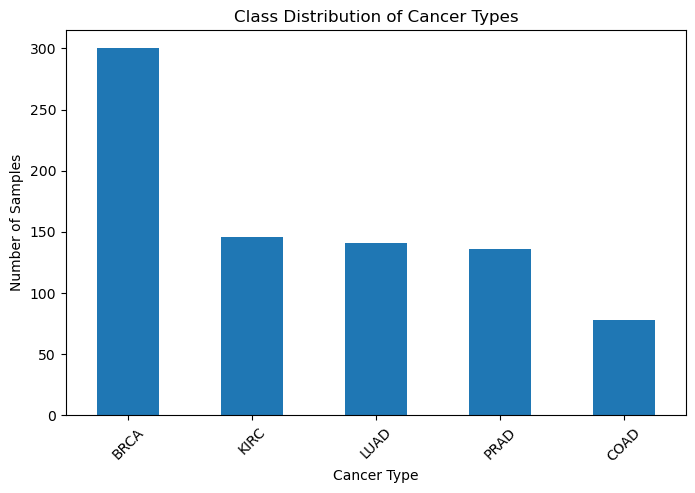

In [46]:
# Plot a bar chart to visualize the distribution of cancer types
plt.figure(figsize=(8,5))  # Set figure size
dataframe['Cancer_Type'].value_counts().plot(kind='bar')  # Create bar plot

# Label the axes and add a title
plt.xlabel("Cancer Type")  # Label for x-axis
plt.ylabel("Number of Samples")  # Label for y-axis
plt.title("Class Distribution of Cancer Types")  # Title of the plot

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

 
## **Data preprocesing** 
This is done to put the data in an appropriate format before modelling


In [47]:
# Separate the feature values (X) from the class labels (y)
# This is necessary because scikit-learn requires them to be separated before training a model

X = dataframe.iloc[:, 0:-1]  # Select all columns except the last one as features
y = dataframe.iloc[:, -1]  # Select the last column as the target (class labels)

In [11]:
X.shape

(801, 8000)

In [12]:
y.shape

(801,)

Encoding Labels

Since the labels in this dataset are categorical, we need to convert them into numeric values. This process is called encoding. Machine learning models typically require numerical inputs, so we encode the labels to ensure compatibility.

In [48]:
# Encode target labels (y) into numeric values ranging from 0 to (n_classes - 1)
# We use LabelEncoder for this process

label_encoder = LabelEncoder()  # Initialize the encoder
label_encoder.fit(y)  # Fit the encoder to the target labels
y_encoded = label_encoder.transform(y)  # Transform categorical labels into numeric values

# Get the list of unique class labels
labels = label_encoder.classes_  # Original class names
classes = np.unique(y_encoded)  # Encoded class labels

In [14]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [15]:
classes

array([0, 1, 2, 3, 4])

\
**Data Splitting**\
We will now split the data into training and test subsets.
The training data is initially parsed to the machine learning model. this is to enable the model to identify discriminatory patterns which can be used to make future predictions.
The testing data is used to evaluate the model after the training phase.

In [49]:
# Split the data into training and test sets
# This helps evaluate model performance on unseen data

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,  # Features and encoded labels
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42  # Set a random state for reproducibility
)

In [50]:
# or

#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [17]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


\
**Data Normalization**\
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [51]:
# Scale the feature values between 0 and 1
# This ensures that all features have the same scale, improving model performance

min_max_scaler = MinMaxScaler()  # Initialize the scaler

# Normalize the training and test sets
X_train_norm = min_max_scaler.fit_transform(X_train)  # Fit and transform training data
X_test_norm = min_max_scaler.transform(X_test)  # Transform test data (without fitting again)

## **Feature Selection**
The purpose of feature selection is to select relevant features for classification. 
Feature selection is usually used as a pre-processing step before doing the actual learning. 

In this tutorial, mutual information algorithm is used to compute the relevance of each feature. The top n (eg. 300) features are selected for the machine learning analysis.

### Feature Selection using Mutual Information

In [20]:
MI=mutual_info_classif(X_train_norm,y_train)

In [21]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [22]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [23]:
X_train_selected.shape

(640, 300)

In [24]:
X_test_selected.shape

(161, 300)

## Classification
The random forest classifier is used in this tutorial. Random forest works with multiclass and high dimensional data. Classification will involve training and testing of the model

Model Training

Model training enables the machine learning model to learn patterns from the data and make predictions on unseen data. During this phase, the model is provided with a training subset to learn from. In this tutorial, we use the Random Forest Classifier for training.

In [52]:
# Random Forest Classifier
# Since this is a multiclass classification problem, we use the One-vs-Rest (OvR) strategy
# This approach trains a separate classifier for each class, treating it as a binary classification problem

RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))  # Initialize the model
RF.fit(X_train_selected, y_train)  # Train the model on the selected features

# Make predictions on the test set
y_pred = RF.predict(X_test_selected)  # Predict class labels
pred_prob = RF.predict_proba(X_test_selected)  # Get predicted probabilities for each class

### Model Evaluation

Once the model is trained, it is essential to assess its performance on independent data (i.e., the test set). To evaluate the model effectively, we use the following metrics:
	•	Accuracy – Measures overall correctness of predictions.
	•	Precision – Indicates how many of the predicted positive cases were actually positive.
	•	Recall – Measures how well the model identifies actual positive cases.
	•	F1 Score – A balance between precision and recall.
	•	Confusion Matrix – Provides insights into correct and incorrect classifications.
	•	ROC Curve – Shows the trade-off between sensitivity and specificity across different thresholds.


In [53]:
# Calculate and display model evaluation metrics

# Accuracy: Measures the overall correctness of predictions
accuracy = np.round(balanced_accuracy_score(y_test, y_pred), 4)
print('Accuracy: %0.4f' % accuracy)

# Precision: Measures the proportion of correctly predicted positive cases
precision = np.round(precision_score(y_test, y_pred, average='weighted'), 4)
print('Precision: %0.4f' % precision)

# Recall: Measures how well the model identifies actual positive cases
recall = np.round(recall_score(y_test, y_pred, average='weighted'), 4)
print('Recall: %0.4f' % recall)

# F1 Score: A balance between precision and recall
f1score = np.round(f1_score(y_test, y_pred, average='weighted'), 4)
print('F1 Score: %0.4f' % f1score)

# Generate and display the classification report
report = classification_report(y_test, y_pred, target_names=labels)
print('\nClassification Report\n')
print(report)

Accuracy: 0.9708
Precision: 0.9815
Recall: 0.9814
F1 Score: 0.9812

Classification Report

              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.96      0.92      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



In [54]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

# Convert it into a DataFrame for better readability
cm_df = pd.DataFrame(cm, index=labels, columns=labels)  # Set row and column labels

In [29]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,1,0,0,23,0
PRAD,0,0,0,0,33


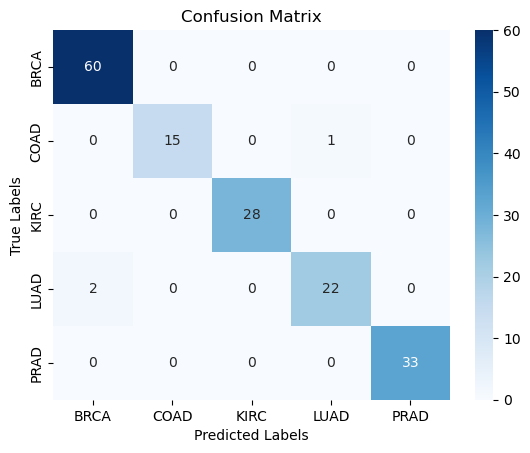

In [55]:
# Visualize the confusion matrix using a heatmap

sns.heatmap(cm_df, annot=True, cmap='Blues')  # Create heatmap with annotations
plt.xlabel('Predicted Labels')  # Label for x-axis
plt.ylabel('True Labels')  # Label for y-axis
plt.title('Confusion Matrix')  # Title for the plot

# Show the plot
plt.show()

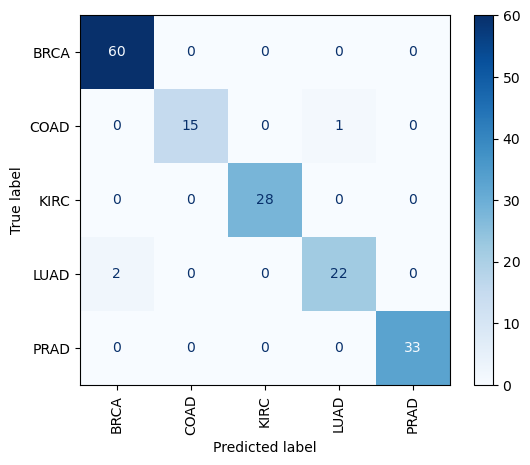

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, RF.predict(X_test_selected))  # Generate confusion matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Initialize display
disp.plot(xticks_rotation='vertical', cmap='Blues')  # Plot with vertical x-axis labels and blue color map

# Show the plot
plt.show()

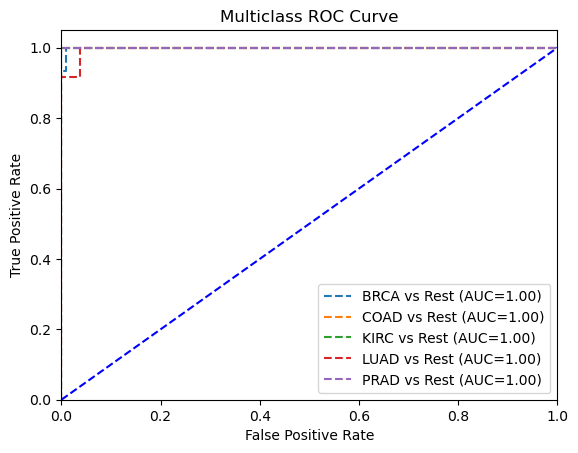

In [57]:
# Generate ROC curves for each class
# We need to binarize y_test labels to match the format of predicted probabilities (pred_prob)

y_test_binarized = label_binarize(y_test, classes=classes)  # Convert y_test into binary format

# Initialize dictionaries to store metrics for each class
fpr = {}  # False Positive Rate
tpr = {}  # True Positive Rate
thresh = {}  # Thresholds
roc_auc = {}  # Area Under the Curve (AUC)

n_class = classes.shape[0]  # Number of classes

# Compute ROC curve for each class
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob[:, i])  # Calculate FPR, TPR, and thresholds
    roc_auc[i] = auc(fpr[i], tpr[i])  # Compute AUC score
    
    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)' % (labels[i], roc_auc[i]))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'b--')

# Set axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# Add labels and title
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')  # Show legend in lower right corner

# Display the plot
plt.show()